In [4]:
import pulp
import matplotlib.pyplot as plt
# Define basic inputs
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
requirements = {'Mon': 20, 'Tue': 22, 'Wed': 18, 'Thu': 24, 'Fri': 30, 'Sat': 28, 'Sun': 26}
wage_per_worker = 1000
overtime_cost = 1200
max_workers_per_day = 35  # upper bound on staffing

In [5]:
# Define the problem
prob = pulp.LpProblem("Workforce_Scheduling_Optimization", pulp.LpMinimize)
# Decision variables
Workers = pulp.LpVariable.dicts("Workers", days, lowBound=0, upBound=max_workers_per_day, cat='Integer')
Shortage = pulp.LpVariable.dicts("Shortage", days, lowBound=0, cat='Integer')
Surplus = pulp.LpVariable.dicts("Surplus", days, lowBound=0, cat='Integer')
# Objective function: wages + shortage penalty
prob += pulp.lpSum([
    Workers[d] * wage_per_worker + Shortage[d] * overtime_cost for d in days
]), "TotalCost"
# Constraints: staffing balance
for d in days:
    prob += Workers[d] + Shortage[d] - Surplus[d] == requirements[d], f"StaffBalance_{d}"


In [6]:
# Solve it
prob.solve()
# Output
Schedule = {d: int(Workers[d].varValue) for d in days}
Shortages = {d: int(Shortage[d].varValue) for d in days}
Surpluses = {d: int(Surplus[d].varValue) for d in days}
TotalCost = int(pulp.value(prob.objective))


In [7]:
print("📅 Day-wise Allocation:\n")
for d in days:
    print(f"{d}: {Schedule[d]} workers | Shortage: {Shortages[d]} | Surplus: {Surpluses[d]}")
print(f"\n💰 Total Cost for the Week: ₹{TotalCost}")


📅 Day-wise Allocation:

Mon: 20 workers | Shortage: 0 | Surplus: 0
Tue: 22 workers | Shortage: 0 | Surplus: 0
Wed: 18 workers | Shortage: 0 | Surplus: 0
Thu: 24 workers | Shortage: 0 | Surplus: 0
Fri: 30 workers | Shortage: 0 | Surplus: 0
Sat: 28 workers | Shortage: 0 | Surplus: 0
Sun: 26 workers | Shortage: 0 | Surplus: 0

💰 Total Cost for the Week: ₹168000


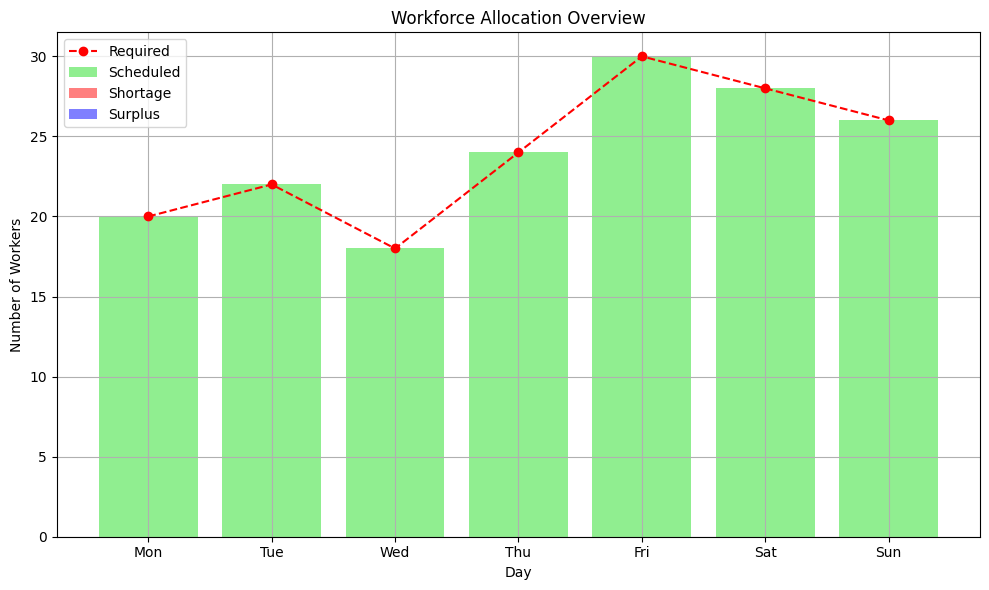

In [8]:
plt.figure(figsize=(10,6))
plt.bar(days, [Schedule[d] for d in days], label='Scheduled', color='lightgreen')
plt.plot(days, [requirements[d] for d in days], 'ro--', label='Required')
plt.bar(days, [Shortages[d] for d in days], color='red', alpha=0.5, label='Shortage')
plt.bar(days, [Surpluses[d] for d in days], color='blue', alpha=0.5, label='Surplus')
plt.title("Workforce Allocation Overview")
plt.ylabel("Number of Workers")
plt.xlabel("Day")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
